# Mean and standard deviation

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

Argue that these formulas indeed describe a discrete distribution.

> widać że $P(x = k) \in [0, 1]$.
>
> $\sum_{k>0} \frac{1}{4}\frac{1}{k(k+1)} = \frac{1}{4}$, analogicznie dla $k < 0$, i $1/2$ dla $k = 0$, więc $\sum_k P(X = k) = 1$
>
> więc jest to rozkład dyskretny

Show that $X$ does not have a mean.

> $0\cdot\frac{1}{2} + \sum_{k>0} k\cdot\frac{1}{4k(k+1)} + \sum_{k<0} k\cdot\frac{1}{4|k|(|k|+1)} = \frac{1}{4} (\sum_{k>0} \frac{1}{k+1} + \sum_{k<0} \text{analogicznie})$

> a taka suma jest rozbieżna, ta dla k > 0 do nieskończoności, ta dla k < 0 do -nieskończoności, więc dodanie tych dwóch sum jest niezdefiniowane i średnia nie istnieje.

Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.

<BarContainer object of 21 artists>

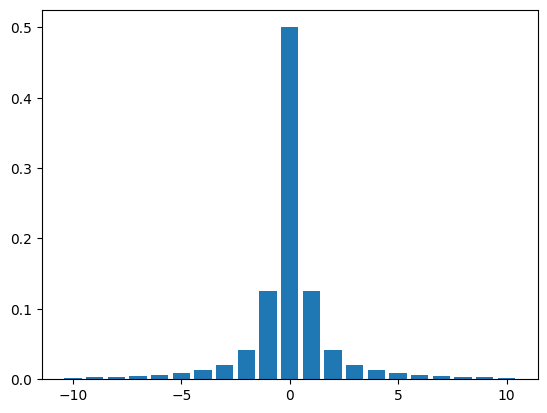

In [8]:
def f(k):
    if k == 0:
        return 1 / 2
    return 1 / (4 * abs(k) * (abs(k) + 1))


r = list(range(-10, 10 + 1))
plt.bar(r, list(map(f, r)))

 Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.

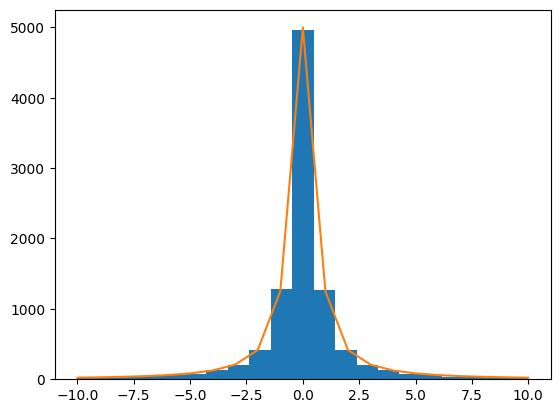

In [122]:
def f_vec():
    # Liczymy wartości f(k) dla k < 22000.
    # Jest to dostatecznie dobre przybliżenie; przy k = 25000, f(k) jest za małe dla floata
    n = 22000
    k = np.arange(1, n + 1)
    k = 1 / (4 * abs(k) * (abs(k) + 1))
    ks = np.concatenate((k[::-1], [1 / 2], k))
    ks = ks / ks.sum()
    return np.arange(-n, n + 1), ks


def sample(n=10000):
    a, b = f_vec()
    return np.random.choice(a, n, p=b)


x = sample()
plt.hist(x, bins=21, range=(-10, 10))

plt.plot(r, [f(k) * len(x) for k in r])  # Jak powinno być

Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.

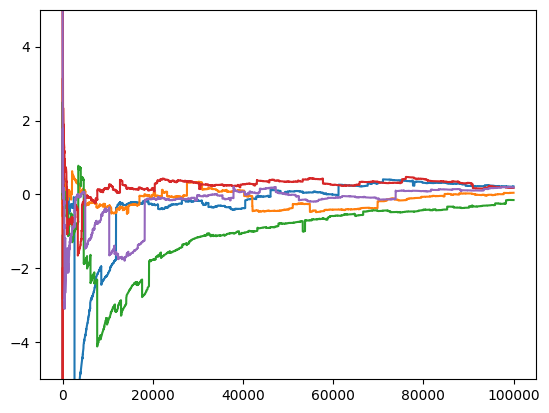

(-1.0, 1.0)

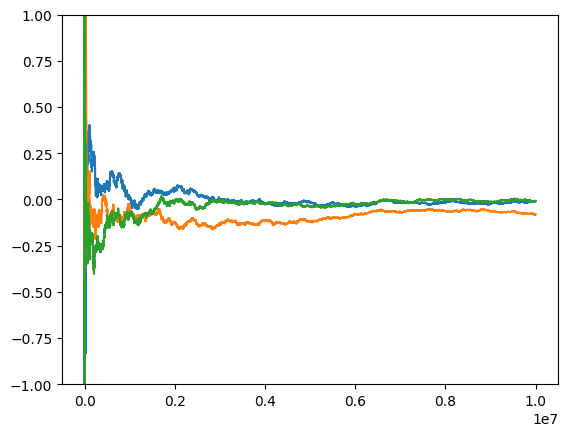

In [114]:
for _ in range(5):
    x = sample(10 ** 5)
    x_bar = np.cumsum(x) / np.arange(1, len(x) + 1)
    plt.plot(x_bar)
plt.ylim((-5, 5))
plt.show()

for _ in range(3):
    x = sample(10 ** 7)
    x_bar = np.cumsum(x) / np.arange(1, len(x) + 1)
    plt.plot(x_bar)
plt.ylim((-1, 1))

# wygląda, że nie do końca zbiegają

For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$.
   You do not need to do it in a clever way (like in ASD lab).

Plot the values of $\hat{x}_i$. Does it look like the series converges?

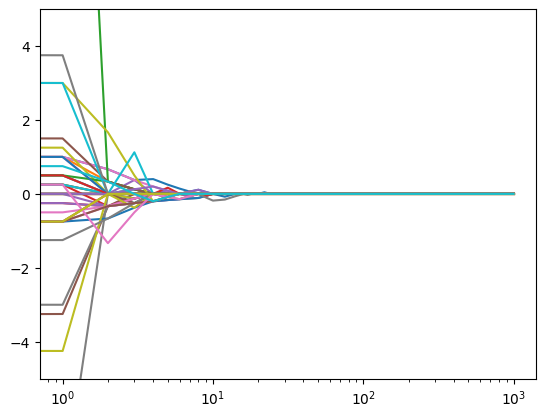

In [130]:
def cummedian(a):
    return np.array([np.median(a[:i + 1]) for i in range(len(a))])


for _ in range(50):
    x = sample(10 ** 3)
    x_hat = cummedian(x) / np.arange(1, len(x) + 1)
    plt.plot(x_hat)
plt.ylim((-5, 5))
plt.xscale("log")

# wygląda, że zbiegają

A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

In [ ]:
# mediana jest lepsza, ponieważ
# a) widać, że lepiej zbiega 🥰
# b) zdarzające się wartości daleko od środka dystrybucji mniej zmieniają wynik w medianie

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.